## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

## Final goal:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Steps to follow:
    1.Reading and Understanding the Data
    2.Data Visualisation
    3.Data Preparation
    4.Model building and evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [3]:
bike=pd.read_csv("day.csv")

In [4]:
# saving the original data in original_bike for not loosing
original_bike=bike.copy()

In [5]:
original_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike.shape

(730, 16)

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#percentage of missing values for column
(bike.isnull().sum() / bike.isnull().count()*100).sort_values(ascending = False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

#### Finding:
There are no missing / Null values 

In [11]:
# check for univarient and bivarient variables
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [12]:
#checking for duplicates
bike[bike.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### Finding:
There are no duplicate values

#### removing unwanted columns, based on requirement:
instant column is index so we can remove that

In [13]:
bike=bike.drop(columns=['instant'])

In [14]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [15]:
# get all unique variables
for col in bike:
    print(bike[col].value_counts(ascending=False), '\n\n')

04-09-2018    1
30-12-2019    1
28-10-2018    1
10-11-2018    1
18-10-2019    1
             ..
17-12-2018    1
02-09-2019    1
08-09-2018    1
03-06-2019    1
30-11-2019    1
Name: dteday, Length: 730, dtype: int64 


3    188
2    184
1    180
4    178
Name: season, dtype: int64 


1    365
0    365
Name: yr, dtype: int64 


12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 


0    709
1     21
Name: holiday, dtype: int64 


2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64 


1    504
0    226
Name: workingday, dtype: int64 


1    463
2    246
3     21
Name: weathersit, dtype: int64 


10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64 


32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
   

#### removing unwanted:
as dteday column is combination of 'yr','mnth' columns we can remove it

In [16]:
bike=bike.drop(['dteday'], axis=1)


In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


## 2.Data Visualisation

#### Visualising Numeric Variables

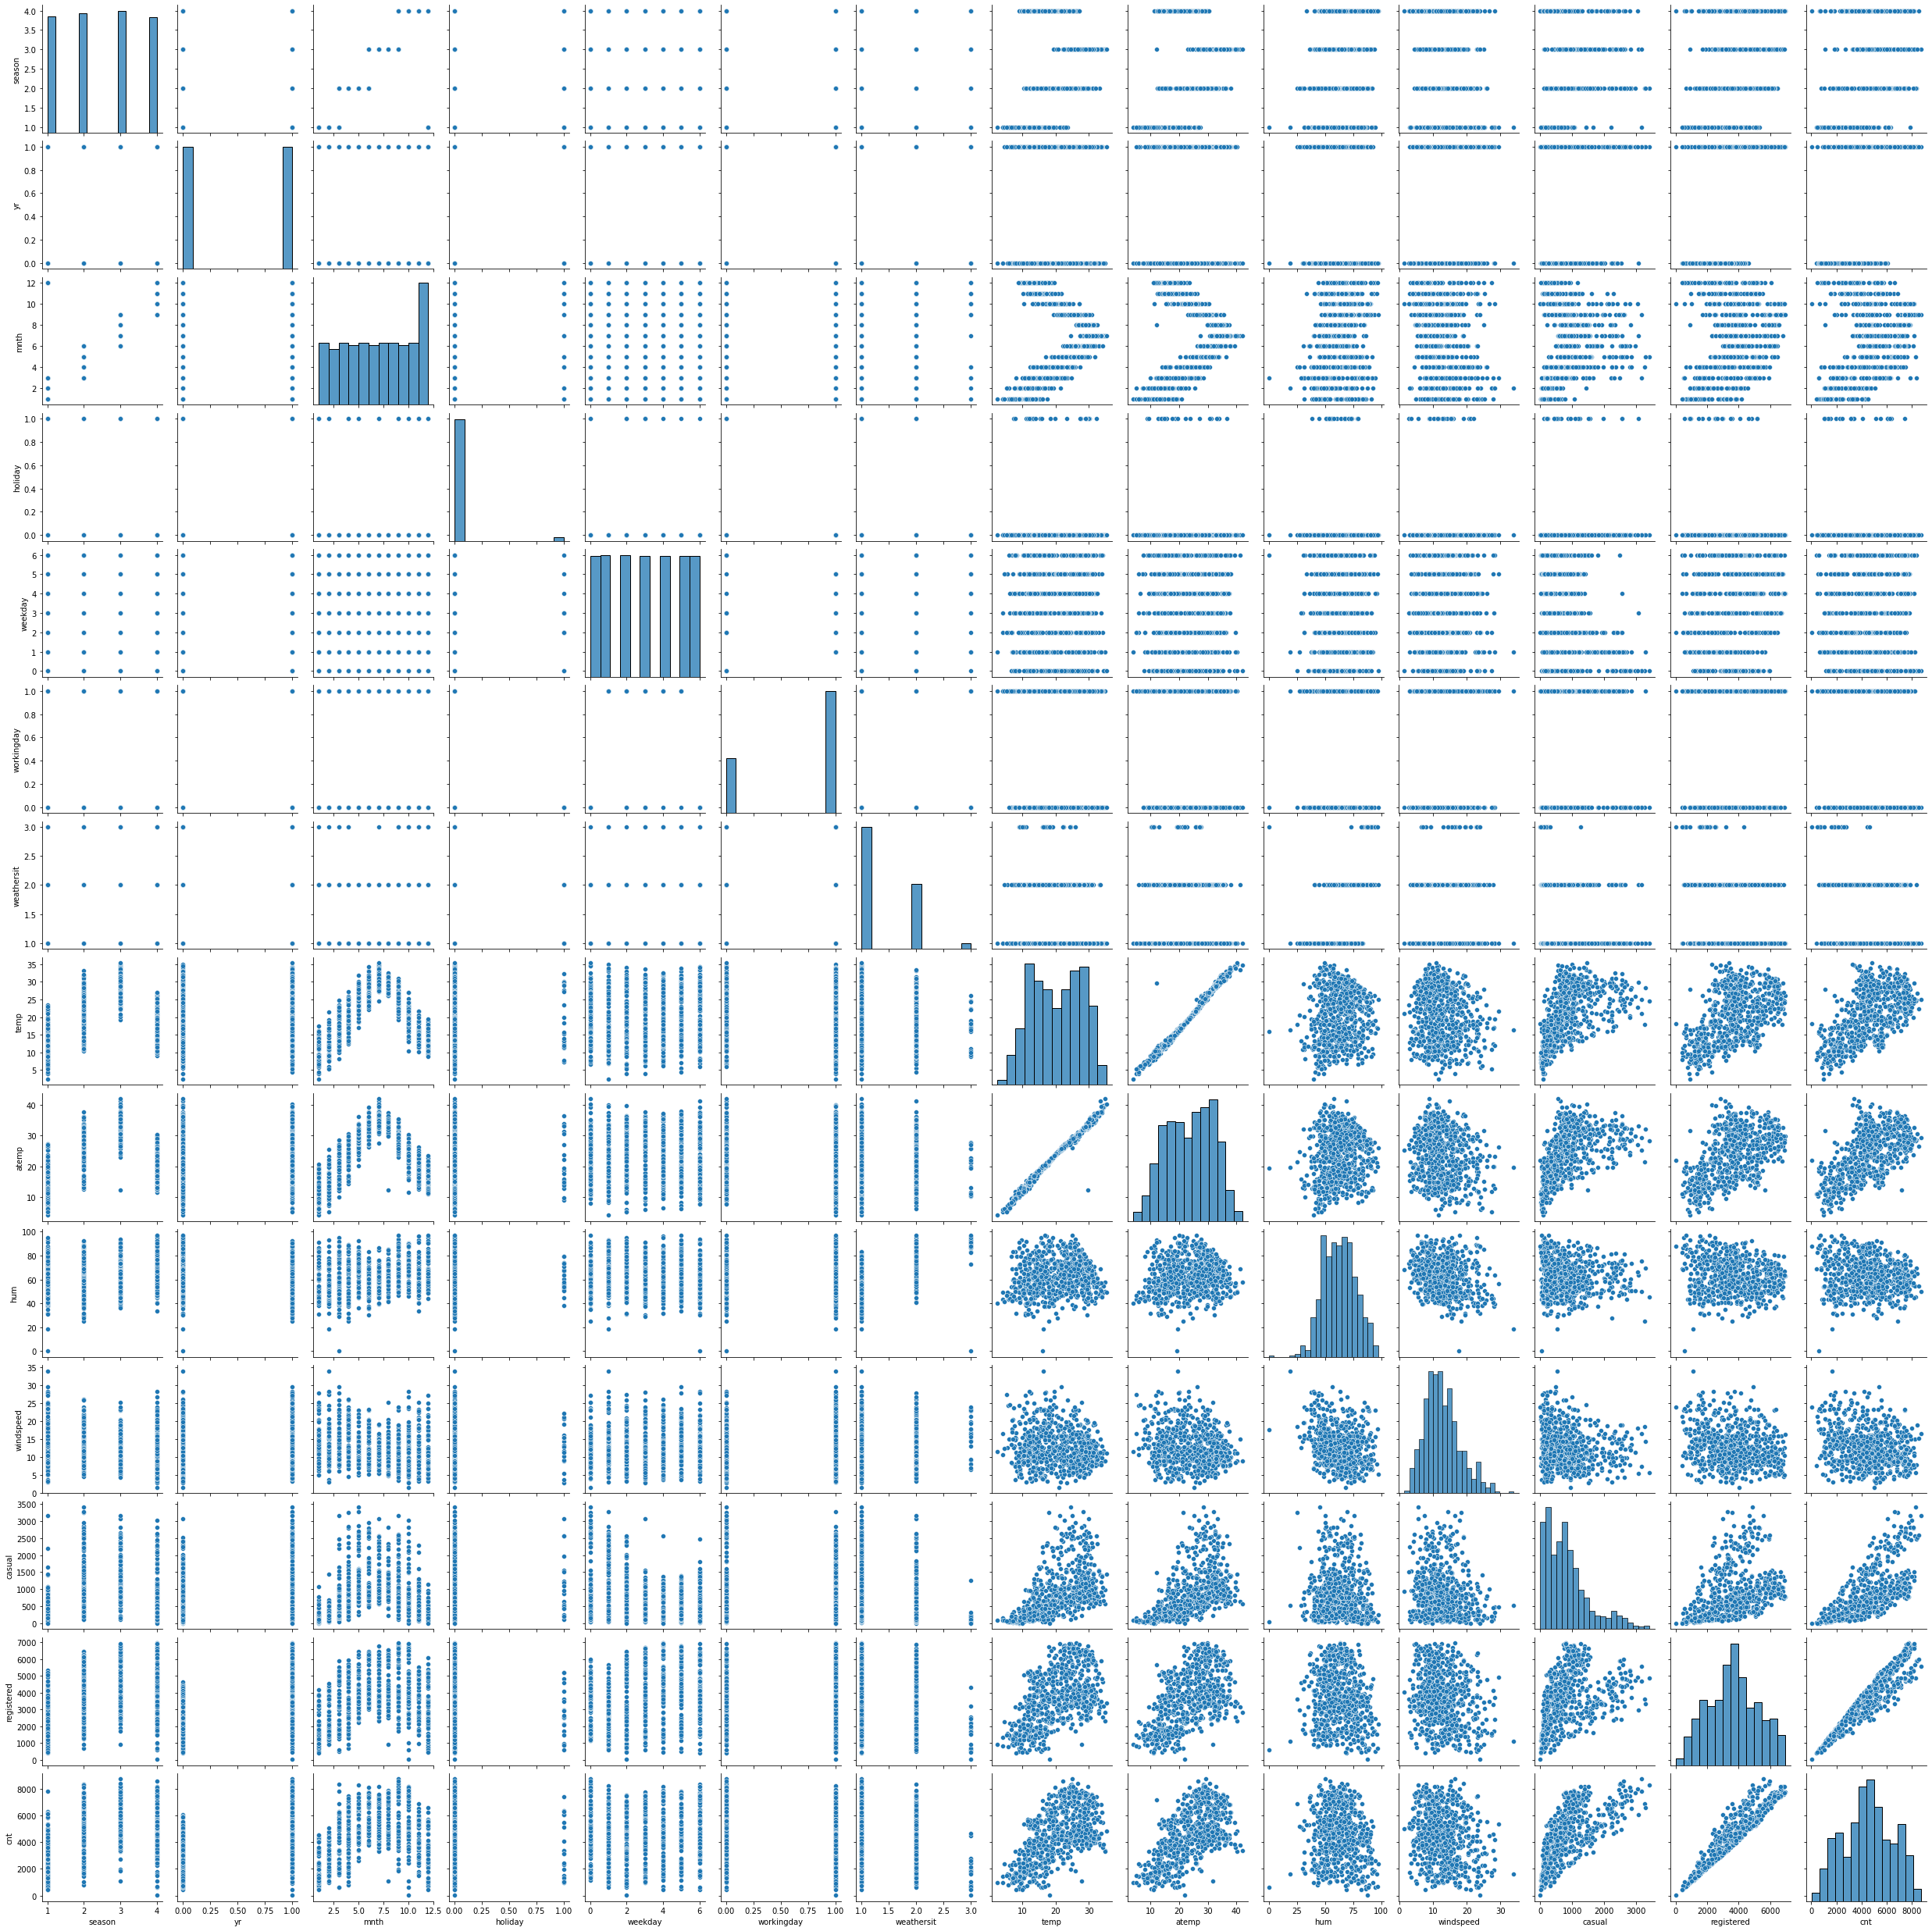

In [18]:
sns.pairplot(bike)
plt.show()

In [19]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### analysing catagorical variables

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

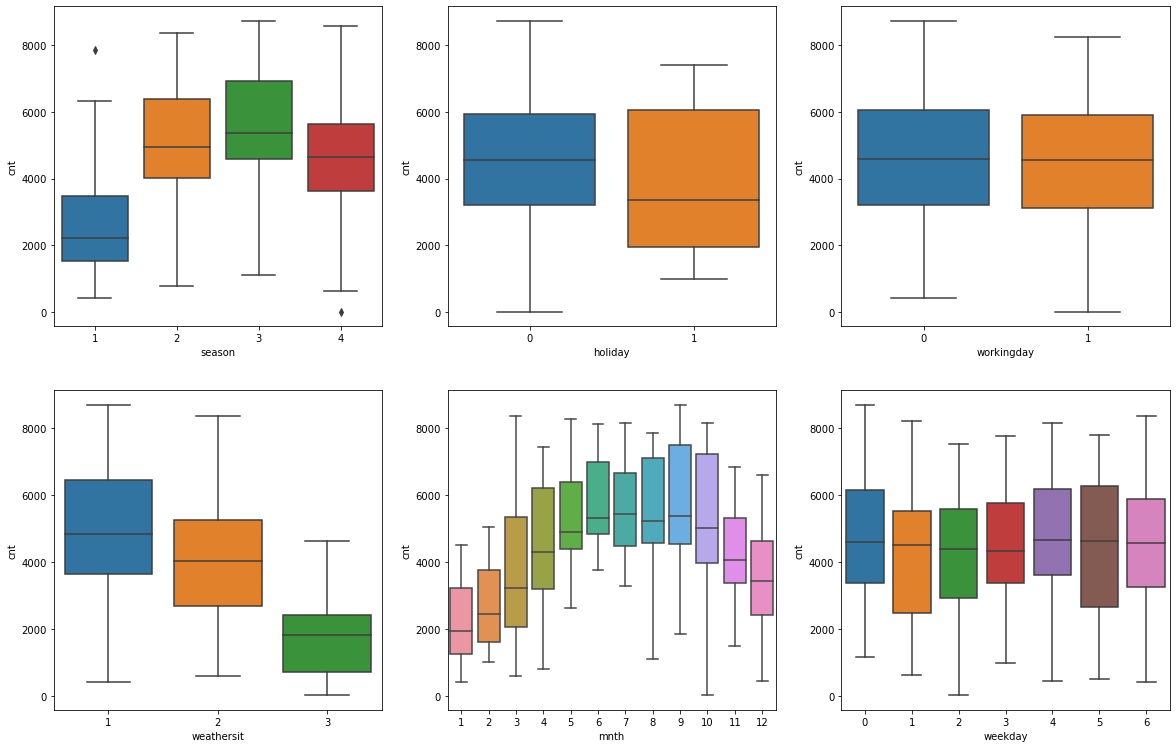

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=bike)

### Finding:

season: mose of the bike booking were happening in season3 with a median of over 4000 booking. This was followed by season2 & season4 with mostly similar kind bookings. by this we can say season can be dependent variable.

holiday: almost all of the bike booking were happening when it is not a holiday which says this data is clearly biased. so we cannot take holiday as dependent variable.

workingday: Almost half of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking. so workingday can be dependent variable.

weathersit: most of the bike booking were happening during ‘weathersit1 with a median of graterthan to 4000 booking. for weathersit2 with little less to weathersit1 of total booking. so weathersit does looks give some effect in bike booking, so we are taking that as dependent variable.

mnth: Almost most of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month.
by this we can say mnth can be dependent variable.

weekday: independent of any week all medians are between 4000 to 5000 bookings.


In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [22]:
bike_numeric=bike[["casual","registered","cnt","temp","atemp","hum","windspeed"]]

In [23]:
bike_numeric.head()

,casual,registered,cnt,temp,atemp,hum,windspeed
0,331,654,985,14.110847,18.18125,80.5833,10.749882
1,131,670,801,14.902598,17.68695,69.6087,16.652113
2,120,1229,1349,8.050924,9.47025,43.7273,16.636703
3,108,1454,1562,8.200000,10.60610,59.0435,10.739832
4,82,1518,1600,9.305237,11.46350,43.6957,12.522300


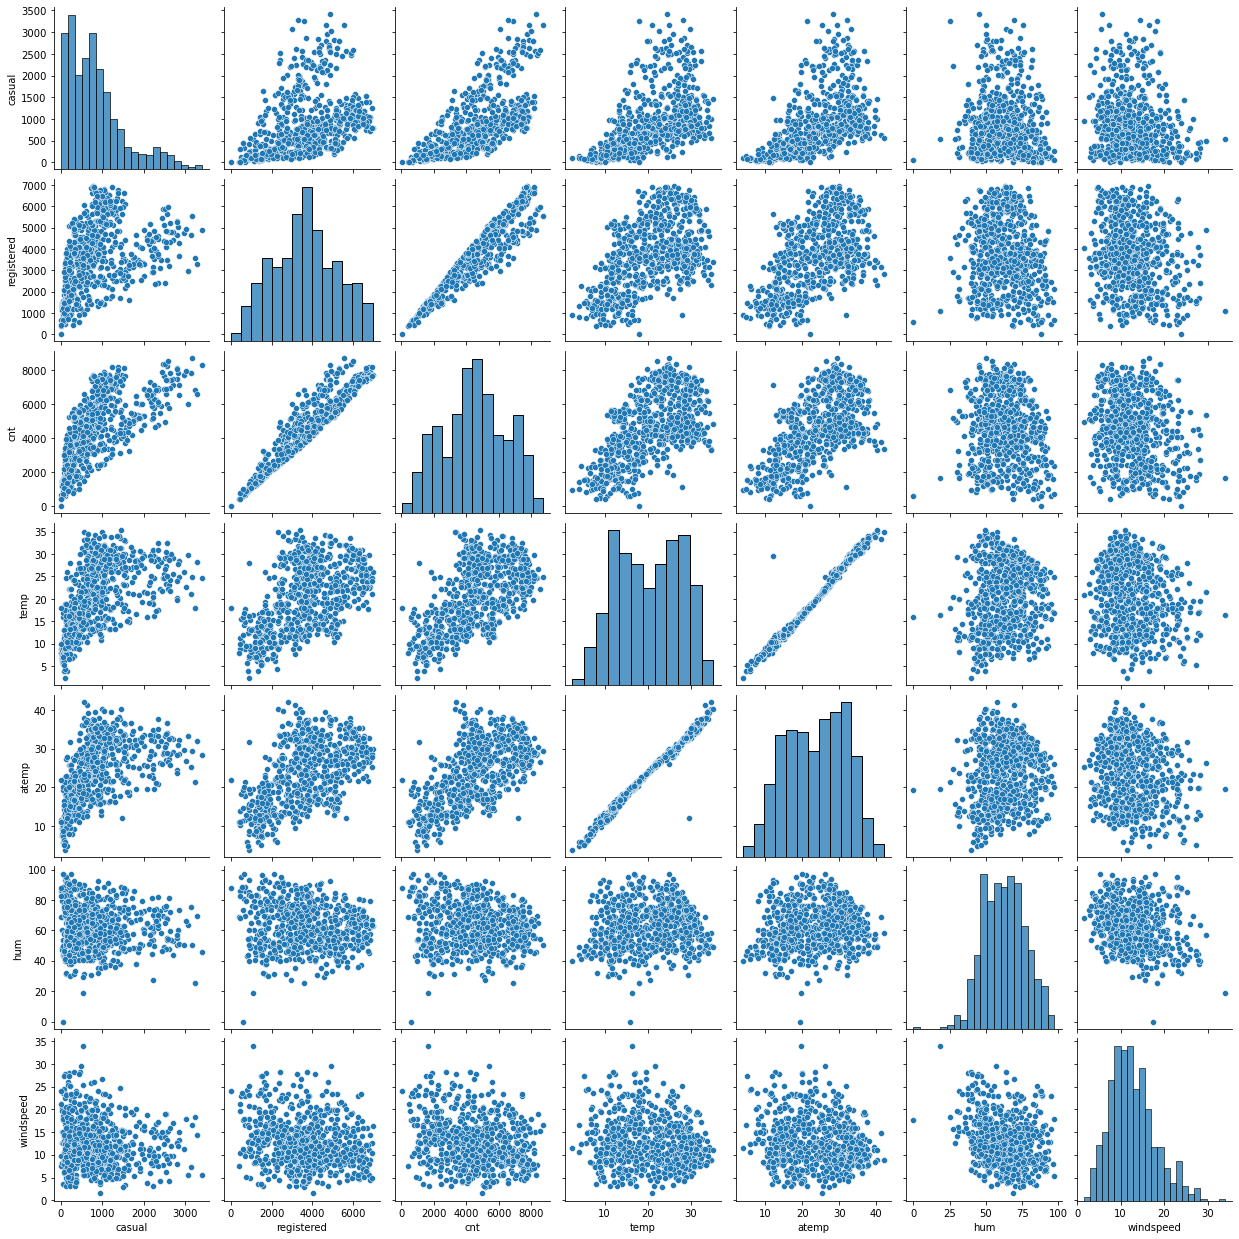

In [24]:
sns.pairplot(bike_numeric)
plt.show()

### Finding:
there is a linear Relation between atemp,temp,cnt,registered

## 3.Data Preparation 

In [25]:
#converting dependent variable catagorical data to categorical with relevant values names
bike.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [26]:
bike.season.astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [27]:
bike.season

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [28]:
bike.mnth=bike.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [29]:
bike.mnth.astype('category').value_counts()

Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [30]:
bike.weekday.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike.weekday.astype('category').value_counts()

Tuesday      105
Monday       105
Wednesday    104
Thursday     104
Sunday       104
Saturday     104
Friday       104
Name: weekday, dtype: int64

In [31]:
bike.weathersit.replace({1:"Clouds",2:"Mist_cloudy",3:"Light_rain",4:"Heavy_Rain"},inplace=True)
bike.weathersit.astype('category').value_counts()

Clouds         463
Mist_cloudy    246
Light_rain      21
Name: weathersit, dtype: int64

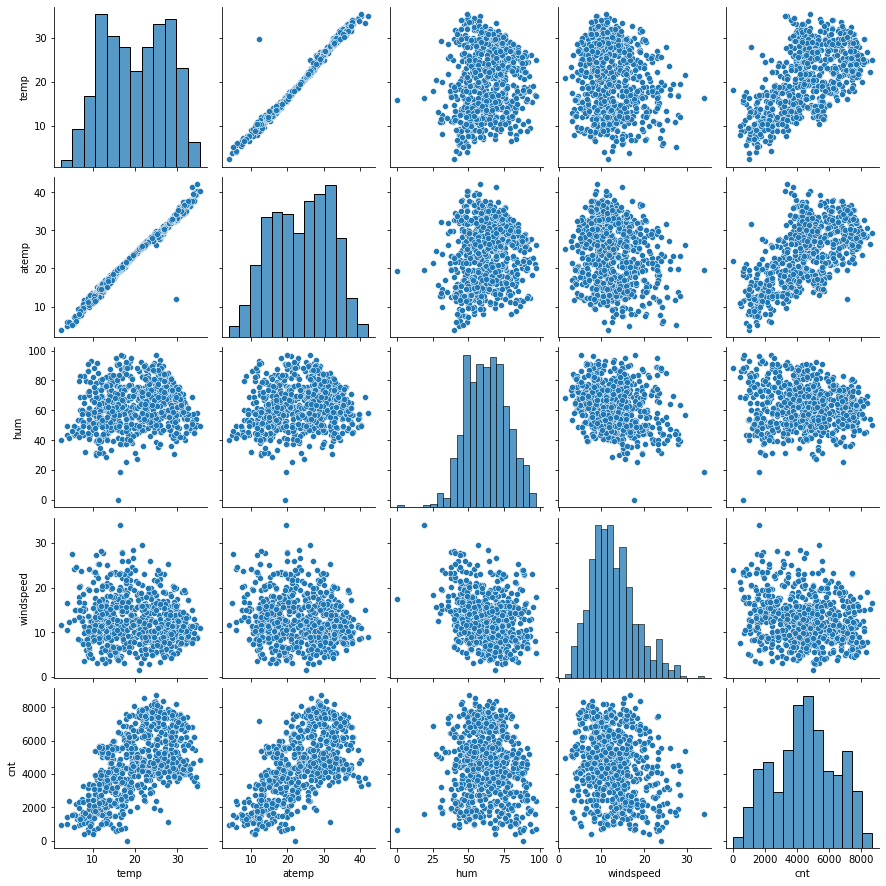

In [32]:
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [33]:
bike_catagorical=bike[["season", "mnth", "weekday", "weathersit"]]

In [34]:
bike_catagorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Monday,Mist_cloudy
1,spring,Jan,Tuesday,Mist_cloudy
2,spring,Jan,Wednesday,Clouds
3,spring,Jan,Thursday,Clouds
4,spring,Jan,Friday,Clouds


In [35]:
bike_dummies = pd.get_dummies(bike_catagorical, drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rain,weathersit_Mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
bike = bike.drop(list(bike_catagorical.columns), axis=1)

In [37]:
bike = pd.concat([bike,bike_dummies],axis=1)

In [38]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   casual                  730 non-null    int64  
 8   registered              730 non-null    int64  
 9   cnt                     730 non-null    int64  
 10  season_spring           730 non-null    uint8  
 11  season_summer           730 non-null    uint8  
 12  season_winter           730 non-null    uint8  
 13  mnth_Aug                730 non-null    uint8  
 14  mnth_Dec                730 non-null    ui

## 4.Splitting the Data into Training and Testing Sets

In [39]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rain,weathersit_Mist_cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,364,1432,1796,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,...,0,0,0,0,1,0,0,0,0,1


In [41]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rain,weathersit_Mist_cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,240,2419,2659,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,736,4232,4968,...,0,0,0,1,0,0,0,0,0,0


there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [43]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rain,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,0.512989,0.650369,0.320768,837.543137,3648.839216,0.513620,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,7.431169,0.212385,0.145882,0.169797,675.921998,1580.336986,0.224593,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,0.526811,0.653714,0.296763,700.000000,3657.000000,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


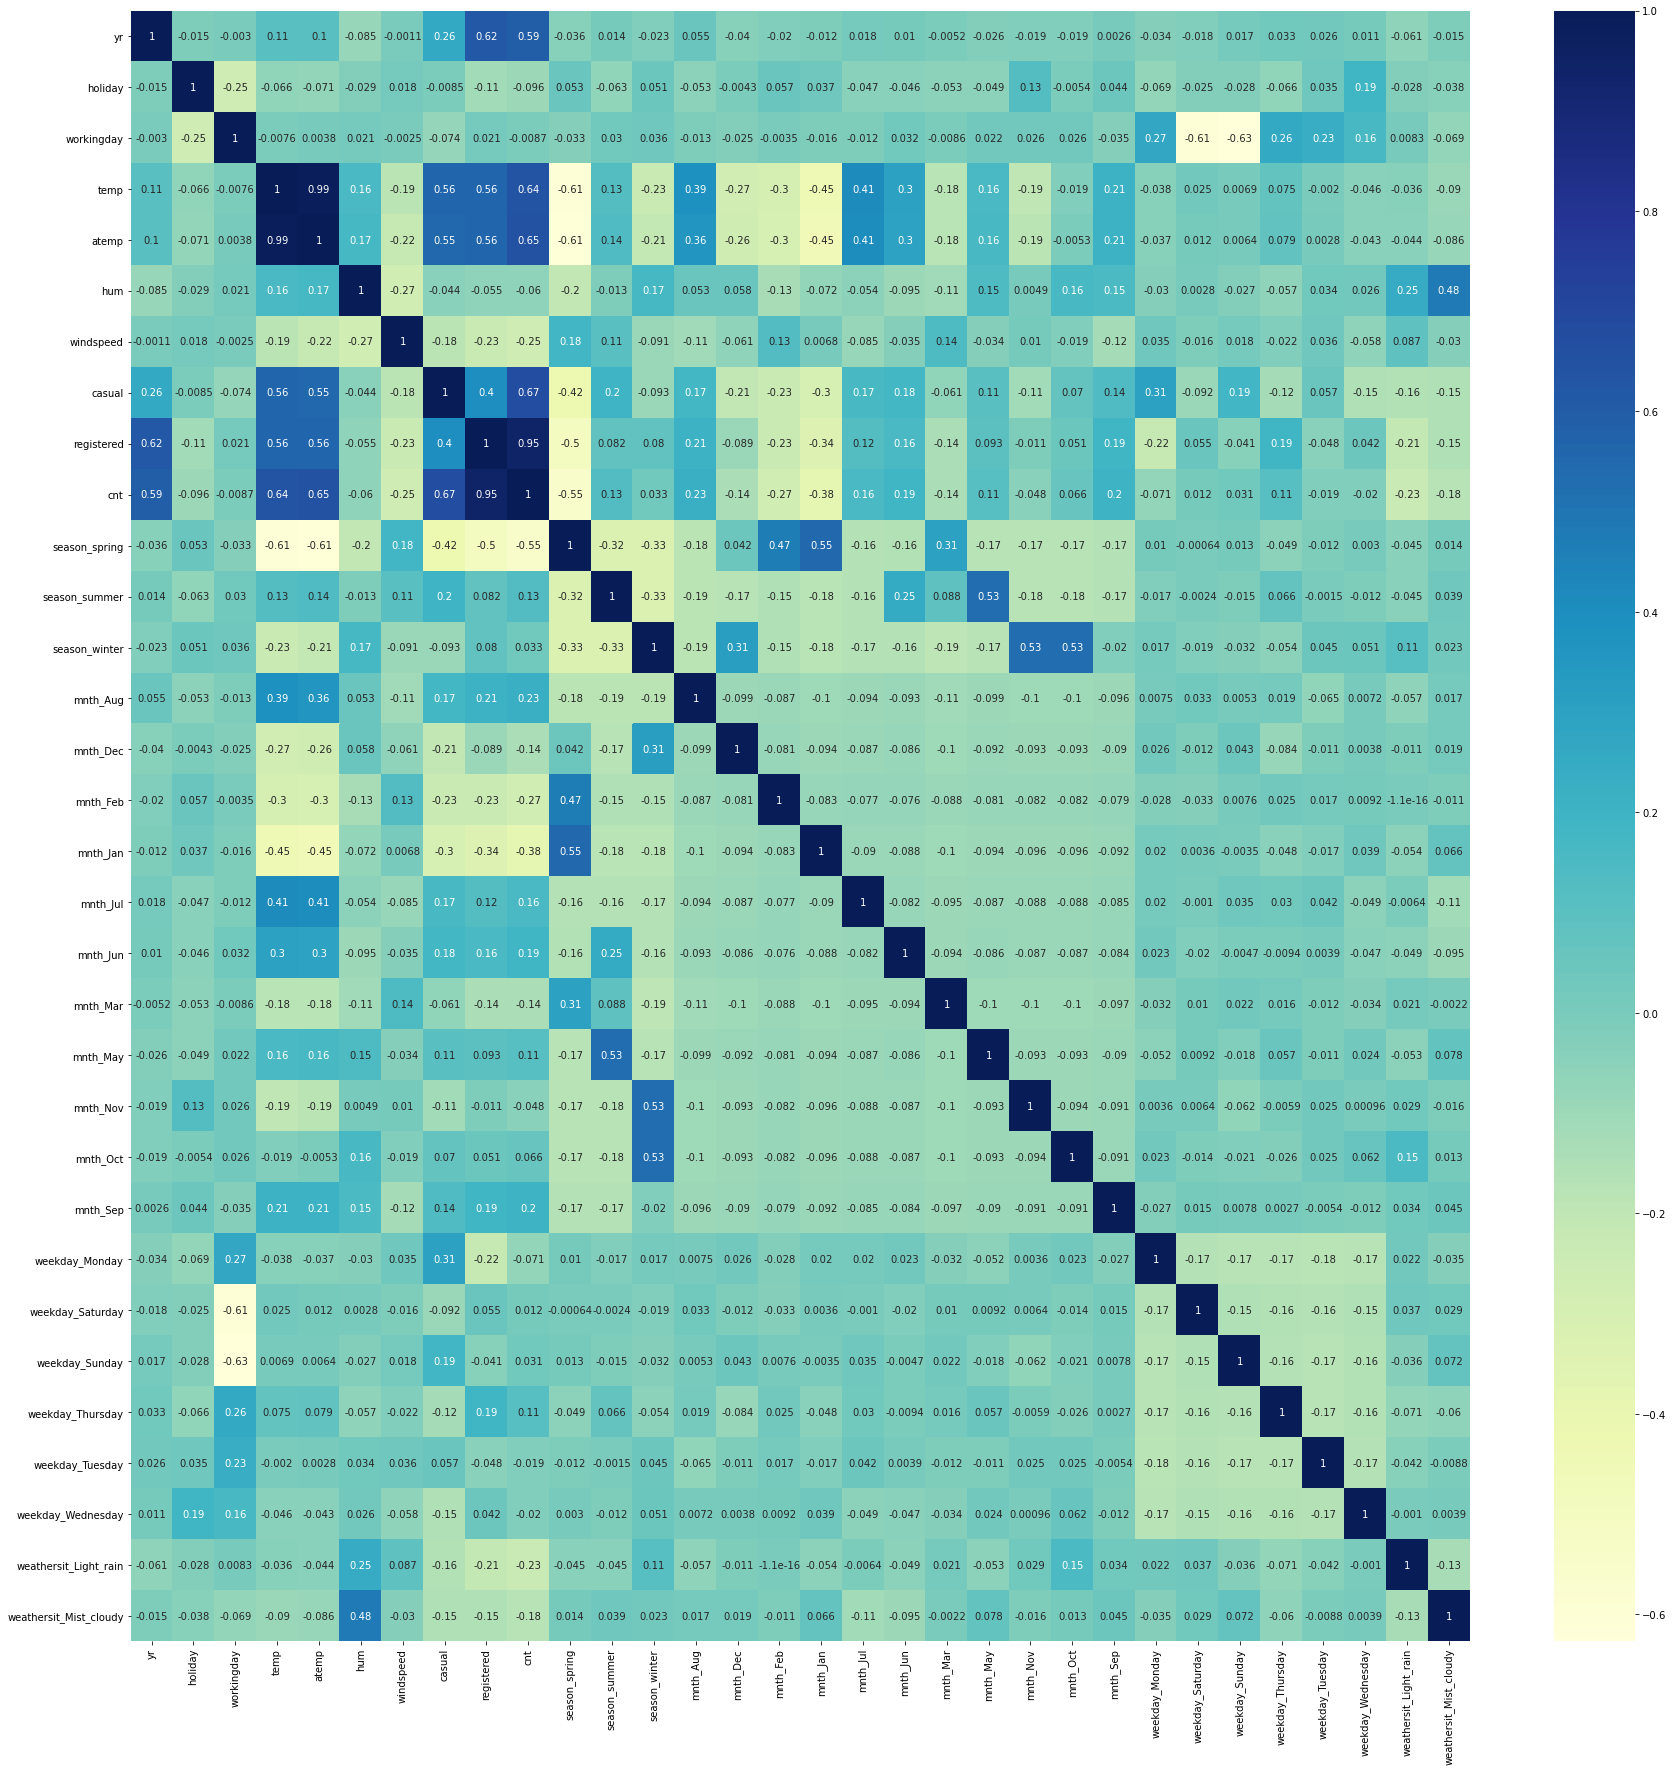

In [45]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [46]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rain,weathersit_Mist_cloudy
653,1,0,1,19.201653,0.501133,0.575354,0.300794,922,6612,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,968,6248,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,956,3110,1,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,0.200348,0.498067,0.663106,364,1432,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,1120,3100,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## 5.Building a linear model


In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 10),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_spring', False, 4),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 7),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 8),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', True, 1),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', True, 1),
 ('weathersit_Light_rain', False, 11),
 ('weathersit_Mist_cloudy', False, 3)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'season_winter', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_Oct', 'mnth_Sep', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'season_spring', 'season_summer', 'mnth_Aug',
       'mnth_Dec', 'mnth_May', 'mnth_Nov', 'weekday_Monday',
       'weathersit_Light_rain', 'weathersit_Mist_cloudy'],
      dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,32.69
6,registered,24.10
3,hum,16.71
5,casual,4.83
0,yr,4.74
4,windspeed,3.98
7,season_winter,3.07
17,weekday_Thursday,1.74
9,mnth_Jan,1.70
19,weekday_Wednesday,1.65


In [57]:
import statsmodels.api as sm

# Add a constant
X_train_ref1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_ref1).fit()

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.140e+30
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:02:57   Log-Likelihood:                 16872.
No. Observations:                 510   AIC:                        -3.370e+04
Df Residuals:                     489   BIC:                        -3.361e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0025    4.1e-16  -6.17e+12      0.000      -0.003      -0.003
yr                 1.735e-17   1.49e-16      0.116      0.907   -2.76e-16     3.1e-16
holiday           -2.151e-16   3.14e-16     -0.686      0.493   -8.32e-16    4.01e-16
atemp               2.22e-16   4.91e-16      0.453      0.651   -7.42e-16    1.19e-15
hum               -1.388e-16   3.91e-16     -0.355      0.723   -9.07e-16     6.3e-16
windspeed         -2.082e-17   3.16e-16     -0.066      0.948   -6.43e-16    6.01e-16
casual                0.0001   9.92e-20   1.16e+15      0.000       0.000       0.000
registered            0.0001    6.3e-20   1.83e+15      0.000       0.000       0.000
season_winter     -1.041e-16   1.73e-16     -0.602      0.547   -4.44e-16    2.35e-16
mnth_Feb           1.388e-17   2.41e-16      0.058      0.954    -4.6e-16    4.88e-16
mnth_Jan          -6.939e-18   2.43e-16     -0.029      0.977   -4.85e-16    4.71e-16
mnth_Jul          -6.939e-17   2.17e-16     -0.320      0.749   -4.95e-16    3.56e-16
mnth_Jun           7.633e-17   2.04e-16      0.374      0.709   -3.25e-16    4.78e-16
mnth_Mar           5.855e-17    1.9e-16      0.308      0.758   -3.14e-16    4.32e-16
mnth_Oct           7.633e-17   2.09e-16      0.365      0.715   -3.35e-16    4.87e-16
mnth_Sep           3.816e-17    1.9e-16      0.200      0.841   -3.36e-16    4.12e-16
weekday_Saturday   6.939e-17   1.62e-16      0.428      0.668   -2.49e-16    3.88e-16
weekday_Sunday     5.117e-17   1.54e-16      0.331      0.741   -2.52e-16    3.55e-16
weekday_Thursday  -1.388e-17   1.64e-16     -0.085      0.933   -3.36e-16    3.08e-16
weekday_Tuesday   -2.776e-17   1.49e-16     -0.187      0.852    -3.2e-16    2.64e-16
weekday_Wednesday  6.939e-18   1.65e-16      0.042      0.966   -3.17e-16    3.31e-16
==============================================================================
Omnibus:                       22.959   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.663
Skew:                           0.167   Prob(JB):                      0.00293
Kurtosis:                       2.339   Cond. No.                     4.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### model 2:
droping the variable 'registered' based on its High Vif value

In [59]:
X_train_rfe=X_train_rfe.drop(['registered'],axis=1)
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.22e-190
Time:                        17:02:57   Log-Likelihood:                 528.30
No. Observations:                 510   AIC:                            -1017.
Df Residuals:                     490   BIC:                            -931.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2883      0.03

In [60]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,21.46
3,hum,16.48
5,casual,4.83
4,windspeed,3.97
6,season_winter,2.58
0,yr,2.27
8,mnth_Jan,1.69
12,mnth_Oct,1.61
9,mnth_Jul,1.58
16,weekday_Thursday,1.57


#### model3:
droping the variable 'atemp' based on its Very High 'VIF' 

In [61]:
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.80e-165
Time:                        17:02:57   Log-Likelihood:                 464.90
No. Observations:                 510   AIC:                            -891.8
Df Residuals:                     491   BIC:                            -811.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4444      0.03

In [62]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,7.85
3,windspeed,3.82
4,casual,3.64
5,season_winter,2.31
0,yr,2.26
11,mnth_Oct,1.60
16,weekday_Tuesday,1.51
17,weekday_Wednesday,1.50
14,weekday_Sunday,1.47
15,weekday_Thursday,1.44


### model4:
droping value hum for having high VIF and p-value

In [63]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     118.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.75e-161
Time:                        17:02:57   Log-Likelihood:                 453.55
No. Observations:                 510   AIC:                            -871.1
Df Residuals:                     492   BIC:                            -794.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3187      0.01

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.18
3,casual,3.00
0,yr,2.26
4,season_winter,1.99
10,mnth_Oct,1.60
15,weekday_Tuesday,1.44
13,weekday_Sunday,1.43
16,weekday_Wednesday,1.35
14,weekday_Thursday,1.32
9,mnth_Mar,1.28


### model 5:
droping weekday_Sunday because it has high p-value

In [65]:
X_train_rfe=X_train_rfe.drop(['weekday_Sunday'],axis=1)
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     126.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.64e-162
Time:                        17:02:57   Log-Likelihood:                 453.48
No. Observations:                 510   AIC:                            -873.0
Df Residuals:                     493   BIC:                            -801.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3199      0.01

In [66]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.09
3,casual,2.79
0,yr,2.26
4,season_winter,1.96
10,mnth_Oct,1.60
14,weekday_Tuesday,1.32
9,mnth_Mar,1.28
15,weekday_Wednesday,1.28
13,weekday_Thursday,1.25
5,mnth_Feb,1.23


### Model:
droping season_winter for having p-value is high

In [67]:
X_train_rfe=X_train_rfe.drop(['season_winter'],axis=1)
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.52e-163
Time:                        17:02:57   Log-Likelihood:                 453.39
No. Observations:                 510   AIC:                            -874.8
Df Residuals:                     494   BIC:                            -807.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3235      0.01

In [68]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.91
3,casual,2.79
0,yr,2.23
13,weekday_Tuesday,1.29
14,weekday_Wednesday,1.27
12,weekday_Thursday,1.24
8,mnth_Mar,1.23
6,mnth_Jul,1.20
7,mnth_Jun,1.20
11,weekday_Saturday,1.20


### model:
droping weekday_Tuesday because it has high p-value

In [69]:
X_train_rfe=X_train_rfe.drop(['weekday_Tuesday'],axis=1)
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.37e-164
Time:                        17:02:57   Log-Likelihood:                 453.29
No. Observations:                 510   AIC:                            -876.6
Df Residuals:                     495   BIC:                            -813.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3251      0.01

In [70]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.79
3,casual,2.78
0,yr,2.21
8,mnth_Mar,1.23
13,weekday_Wednesday,1.22
7,mnth_Jun,1.20
4,mnth_Feb,1.19
6,mnth_Jul,1.19
12,weekday_Thursday,1.19
5,mnth_Jan,1.18


### model:
droping mnth_Oct for having high p-value

In [71]:
X_train_rfe=X_train_rfe.drop(['mnth_Oct'],axis=1)
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.28e-165
Time:                        17:02:57   Log-Likelihood:                 453.10
No. Observations:                 510   AIC:                            -878.2
Df Residuals:                     496   BIC:                            -818.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3265      0.01

In [72]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.73
3,casual,2.68
0,yr,2.21
8,mnth_Mar,1.20
12,weekday_Wednesday,1.20
11,weekday_Thursday,1.19
4,mnth_Feb,1.18
5,mnth_Jan,1.17
6,mnth_Jul,1.17
7,mnth_Jun,1.17


#### we are taking lm7 as a good model and stoping making more modules as there are no VIF>5 and pvalues>0.5

## 7.Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [73]:
y_train_pred = lm7.predict(X_train_rfe7)

Text(0.5, 0, 'Errors')

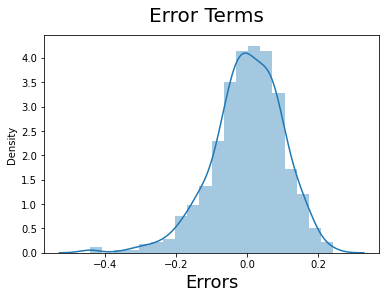

In [74]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [75]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [76]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      219 non-null    int64  
 1   holiday                 219 non-null    int64  
 2   workingday              219 non-null    int64  
 3   temp                    219 non-null    float64
 4   atemp                   219 non-null    float64
 5   hum                     219 non-null    float64
 6   windspeed               219 non-null    float64
 7   casual                  219 non-null    int64  
 8   registered              219 non-null    int64  
 9   season_spring           219 non-null    uint8  
 10  season_summer           219 non-null    uint8  
 11  season_winter           219 non-null    uint8  
 12  mnth_Aug                219 non-null    uint8  
 13  mnth_Dec                219 non-null    uint8  
 14  mnth_Feb                219 non-null    u

In [77]:
X_train_new=X_train_rfe7.drop(['const'], axis=1)

In [78]:

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

### 8. Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [79]:
# Making predictions using the final model (lr6)

y_pred = lm7.predict(X_test_new)

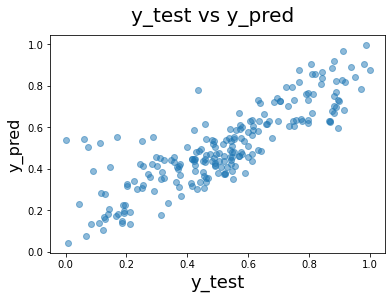

In [80]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### Applying the scaling on the test sets

#### Dividing into X_test and y_test

### This looks pretty desent to make predictions 

#### R^2 Value for TEST

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.1268495909884236

In [83]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7163030944052602

In [84]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.6692731260981108

R-squared for lm7 model is 0.798

In [85]:
X_t=X_train_new.iloc[:,0].values

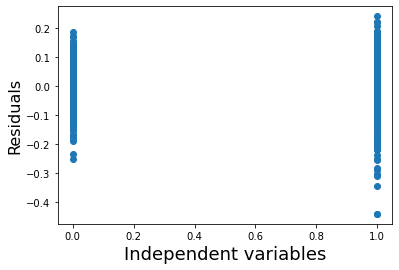

In [86]:
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [87]:
X_train_new.head()

,yr,holiday,windspeed,casual,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_Sep,weekday_Saturday,weekday_Thursday,weekday_Wednesday
653,1,0,0.300794,922,0,0,0,0,0,0,0,0,1
576,1,0,0.264686,968,0,0,1,0,0,0,0,0,1
426,1,0,0.255342,956,0,0,0,0,1,0,0,0,0
728,1,0,0.663106,364,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,1120,0,0,0,0,0,0,0,0,0


In [88]:
print(X_train_rfe7.columns)
print(lm7.summary())

Index(['const', 'yr', 'holiday', 'windspeed', 'casual', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_Sep', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Wednesday'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.28e-165
Time:                        17:03:21   Log-Likelihood:                 453.10
No. Observations:                 510   AIC:                            -878.2
Df Residuals:                     496   BIC:                            -818.9
Df Model:                          13                                         
Covariance Type:            nonrobust                          

### We can see that the equation for best fitted line is:

$ cnt = 0.2098  \times  yr -0.1097  \times  holiday - 0.1403 \times windspeed + 0.0001 \times casual - 0.1441 \times mnth_Feb - 0.1935 \times mnth_Jan + 0.0298 \times mnth_Jul + 0.0632 \times mnth_Jun - 0.0890 \times mnth_Mar + 0.0776 \times mnth_Sep + 0.0634 \times weekday_Saturday + 0.1057 \times weekday_Thursday + 0.0678 \times weekday_Wednesday $

### we can see domain is dependent on the following variables

directly proportional to:
𝑦𝑟, 𝑐𝑎𝑠𝑢𝑎𝑙, 𝑚𝑛𝑡ℎ_𝐽𝑢𝑙, 𝑚𝑛𝑡ℎ_𝐽𝑢𝑛, 𝑚𝑛𝑡ℎ_𝑆𝑒𝑝, 𝑤𝑒𝑒𝑘𝑑𝑎𝑦_𝑆𝑎𝑡𝑢𝑟𝑑𝑎𝑦, 𝑤𝑒𝑒𝑘𝑑𝑎𝑦_𝑇ℎ𝑢𝑟𝑠𝑑𝑎𝑦, 𝑤𝑒𝑒𝑘𝑑𝑎𝑦_𝑊𝑒𝑑𝑛𝑒𝑠𝑑𝑎𝑦

and inversely proportional to:
ℎ𝑜𝑙𝑖𝑑𝑎𝑦, 𝑤𝑖𝑛𝑑_𝑠𝑝𝑒𝑒𝑑, 𝑚𝑛𝑡ℎ_𝐹𝑒𝑏 ,𝑚𝑛𝑡ℎ_𝐽𝑎𝑛, 𝑚𝑛𝑡ℎ_𝑀𝑎𝑟

Demands decreases in following months:
𝑚𝑛𝑡ℎ_𝐹𝑒𝑏 ,𝑚𝑛𝑡ℎ_𝐽𝑎𝑛, 𝑚𝑛𝑡ℎ_𝑀𝑎𝑟

and Demands increases in following months and days:
𝑚𝑛𝑡ℎ_𝐽𝑢𝑙, 𝑚𝑛𝑡ℎ_𝐽𝑢𝑛, 𝑚𝑛𝑡ℎ_𝑆𝑒𝑝, 𝑤𝑒𝑒𝑘𝑑𝑎𝑦_𝑆𝑎𝑡𝑢𝑟𝑑𝑎𝑦, 𝑤𝑒𝑒𝑘𝑑𝑎𝑦_𝑇ℎ𝑢𝑟𝑠𝑑𝑎𝑦, 𝑤𝑒𝑒𝑘𝑑𝑎𝑦_𝑊𝑒𝑑𝑛𝑒𝑠𝑑𝑎𝑦

